In [1]:
# Import libraries
import pandas as pd
import numpy as np


# Load the data

df = pd.read_csv("C:/Users/Asus/OneDrive/Desktop/ML project/cosmetics.csv")

# Display a sample of five rows
df.head()


,Label,Brand,Name,Price,Rank,Ingredients,Combination,Dry,Normal,Oily,Sensitive
0,Moisturizer,LA MER,Crème de la Mer,175,4.1,"Algae (Seaweed) Extract, Mineral Oil, Petrolat...",1,1,1,1,1
1,Moisturizer,SK-II,Facial Treatment Essence,179,4.1,"Galactomyces Ferment Filtrate (Pitera), Butyle...",1,1,1,1,1
2,Moisturizer,DRUNK ELEPHANT,Protini™ Polypeptide Cream,68,4.4,"Water, Dicaprylyl Carbonate, Glycerin, Ceteary...",1,1,1,1,0
3,Moisturizer,LA MER,The Moisturizing Soft Cream,175,3.8,"Algae (Seaweed) Extract, Cyclopentasiloxane, P...",1,1,1,1,1
4,Moisturizer,IT COSMETICS,Your Skin But Better™ CC+™ Cream with SPF 50+,38,4.1,"Water, Snail Secretion Filtrate, Phenyl Trimet...",1,1,1,1,1


**Exploratory Data Analysis**

In [2]:
df.Label.value_counts()

Label
Moisturizer    298
Cleanser       281
Face Mask      266
Treatment      248
Eye cream      209
Sun protect    170
Name: count, dtype: int64

In [3]:
# Check for missing values
print(df.isnull().sum())

Label          0
Brand          0
Name           0
Price          0
Rank           0
Ingredients    0
Combination    0
Dry            0
Normal         0
Oily           0
Sensitive      0
dtype: int64


In [4]:
# Describe the numerical features
print(df.describe())


             Price         Rank  Combination          Dry       Normal  \
count  1472.000000  1472.000000   1472.00000  1472.000000  1472.000000   
mean     55.584239     4.153261      0.65625     0.614130     0.652174   
std      45.014429     0.633918      0.47512     0.486965     0.476442   
min       3.000000     0.000000      0.00000     0.000000     0.000000   
25%      30.000000     4.000000      0.00000     0.000000     0.000000   
50%      42.500000     4.300000      1.00000     1.000000     1.000000   
75%      68.000000     4.500000      1.00000     1.000000     1.000000   
max     370.000000     5.000000      1.00000     1.000000     1.000000   

              Oily    Sensitive  
count  1472.000000  1472.000000  
mean      0.607337     0.513587  
std       0.488509     0.499985  
min       0.000000     0.000000  
25%       0.000000     0.000000  
50%       1.000000     1.000000  
75%       1.000000     1.000000  
max       1.000000     1.000000  


In [5]:
# Explore categorical features
for column in df.select_dtypes(include=['object']):
  print(f"\nColumn: {column}")
  print(df[column].value_counts())



Column: Label
Label
Moisturizer    298
Cleanser       281
Face Mask      266
Treatment      248
Eye cream      209
Sun protect    170
Name: count, dtype: int64

Column: Brand
Brand
CLINIQUE              79
SEPHORA COLLECTION    66
SHISEIDO              63
ORIGINS               54
MURAD                 47
                      ..
SON & PARK             1
MAKEUP ERASER          1
KAT VON D              1
NURSE JAMIE            1
DERMAFLASH             1
Name: count, Length: 116, dtype: int64

Column: Name
Name
Crème de la Mer                                       1
Cocoa Moisture Mask                                   1
Lip Mask                                              1
Extra-Firming Mask                                    1
pores no more® Vacuum Cleaner® Pore Purifying Mask    1
                                                     ..
Renewing Cleansing Cream                              1
High Potency Classics: Nutritive Cleanser             1
Essential-C Toner                    

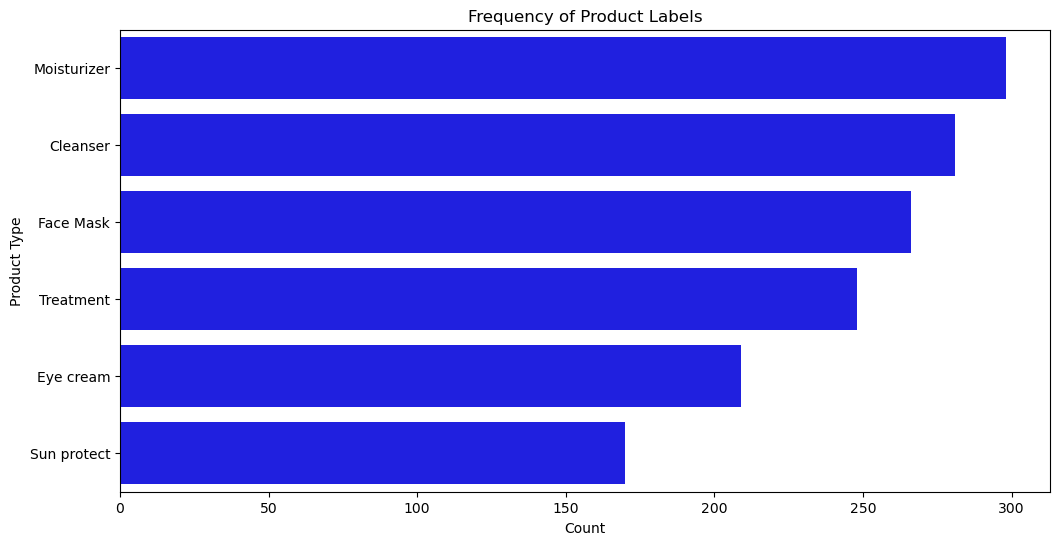

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
# Count the occurrences of each label
label_counts = df['Label'].value_counts()

plt.figure(figsize=(12, 6))
sns.countplot(y=df['Label'], order=df['Label'].value_counts().index, color="blue")
plt.title('Frequency of Product Labels')
plt.xlabel('Count')
plt.ylabel('Product Type')
plt.show()

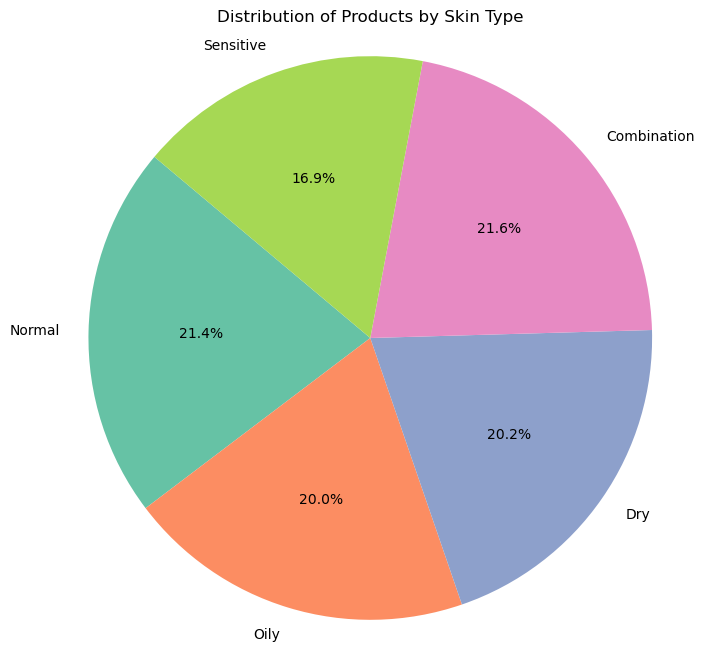

In [7]:
import matplotlib.pyplot as plt

# Count the number of products for each skin type
skin_type_counts = df[['Normal', 'Oily', 'Dry', 'Combination', 'Sensitive']].sum()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(skin_type_counts, labels=skin_type_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('Set2'))
plt.title('Distribution of Products by Skin Type')
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is a circle.
plt.show()


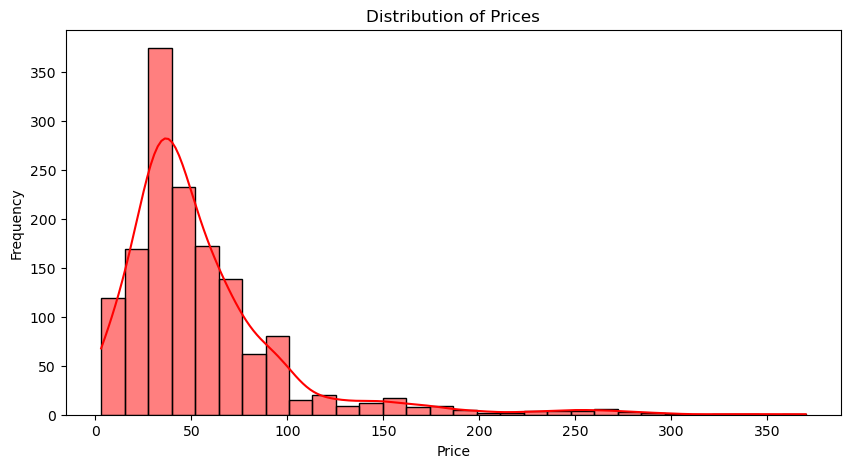

In [8]:
# Plot distribution of prices
plt.figure(figsize=(10, 5))
sns.histplot(df['Price'], kde=True, bins=30,color='red')
plt.title('Distribution of Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

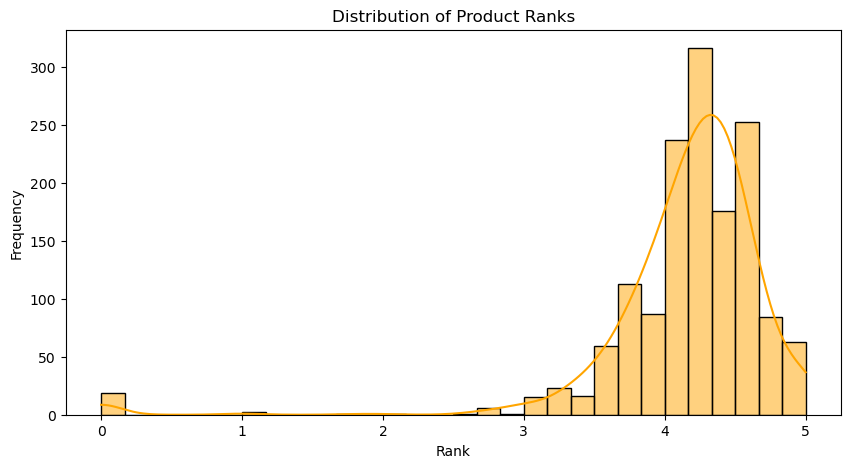

In [9]:
# Plot distribution of ranks
plt.figure(figsize=(10, 5))
sns.histplot(df['Rank'], kde=True, bins=30,color='orange')
plt.title('Distribution of Product Ranks')
plt.xlabel('Rank')
plt.ylabel('Frequency')
plt.show()

In [10]:
# Filter for moisturizers
moisturizers = df[df['Label'] == 'Moisturizer']
moisturizers.head()

,Label,Brand,Name,Price,Rank,Ingredients,Combination,Dry,Normal,Oily,Sensitive
0,Moisturizer,LA MER,Crème de la Mer,175,4.1,"Algae (Seaweed) Extract, Mineral Oil, Petrolat...",1,1,1,1,1
1,Moisturizer,SK-II,Facial Treatment Essence,179,4.1,"Galactomyces Ferment Filtrate (Pitera), Butyle...",1,1,1,1,1
2,Moisturizer,DRUNK ELEPHANT,Protini™ Polypeptide Cream,68,4.4,"Water, Dicaprylyl Carbonate, Glycerin, Ceteary...",1,1,1,1,0
3,Moisturizer,LA MER,The Moisturizing Soft Cream,175,3.8,"Algae (Seaweed) Extract, Cyclopentasiloxane, P...",1,1,1,1,1
4,Moisturizer,IT COSMETICS,Your Skin But Better™ CC+™ Cream with SPF 50+,38,4.1,"Water, Snail Secretion Filtrate, Phenyl Trimet...",1,1,1,1,1


In [11]:
# Filter for Cleanser
Cleanser = df[df['Label'] == 'Cleanser']
Cleanser = Cleanser.reset_index(drop = True)
Cleanser.head()

,Label,Brand,Name,Price,Rank,Ingredients,Combination,Dry,Normal,Oily,Sensitive
0,Cleanser,DRUNK ELEPHANT,T.L.C. Sukari Babyfacial™,80,4.5,"Water, Glycolic Acid, Hydroxyethyl Acrylate/So...",1,1,1,1,0
1,Cleanser,DRUNK ELEPHANT,T.L.C. Framboos™ Glycolic Night Serum,90,4.3,"Water, Glycolic Acid, Butylene Glycol, Glyceri...",1,1,1,1,0
2,Cleanser,FRESH,Soy Face Cleanser,38,4.4,"Water, Coco-Glucoside, Glycerin, Butylene Glyc...",0,0,0,0,0
3,Cleanser,FARMACY,Green Clean Makeup Meltaway Cleansing Balm wit...,34,4.6,"Cetyl Ethylhexanoate, Caprylic/Capric Triglyce...",1,1,1,1,1
4,Cleanser,PHILOSOPHY,Purity Made Simple Cleanser,24,4.5,"Water, Sodium Lauroamphoacetate, Sodium Tridec...",1,1,1,1,1


In [12]:
# Filter for Face Mask
Face_Mask = df[df['Label'] == "Face Mask"]
Face_Mask = Face_Mask.reset_index(drop = True)
Face_Mask.head()

,Label,Brand,Name,Price,Rank,Ingredients,Combination,Dry,Normal,Oily,Sensitive
0,Face Mask,PETER THOMAS ROTH,Mask Frenzy,75,4.8,"Magnesium Sulfate, Butyrospermum Parkii (Shea)...",1,1,1,1,1
1,Face Mask,SK-II,Facial Treatment Mask,135,4.4,"Water, Saccharomycopsis Ferment Filtrate*, But...",1,1,1,1,1
2,Face Mask,DR. JART+,Mask Heroes Face Savers,36,4.9,Visit the Dr. Jart+ boutique,1,1,1,1,1
3,Face Mask,SEPHORA COLLECTION,Face Mask Magic,25,5.0,"Coconut Face Mask: Water, Butylene Glycol, Gly...",1,1,1,1,1
4,Face Mask,SUMMER FRIDAYS,Jet Lag Mask,48,4.1,"Water, Caprylic/Capric Triglyceride, Castanea ...",1,1,1,1,1


In [15]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.feature_extraction.text import TfidfVectorizer # import the missing module
from sklearn.metrics.pairwise import cosine_similarity # import the missing module

# Create TF-IDF vectors for ingredients
def PCA_Process(my_df):
    vectorizer = TfidfVectorizer(stop_words='english')
    tfidf_matrix = vectorizer.fit_transform(my_df['Ingredients'])

    pca = PCA(n_components=2)
    pca_features = pca.fit_transform(tfidf_matrix.toarray())

    # Make X, Y columns in your DataFrame
    my_df['X'] = pca_features[:, 0]
    my_df['Y'] = pca_features[:, 1]
    return my_df

select_category=input()
result_df = PCA_Process(eval(select_category))

moisturizers


C:\Users\Asus\AppData\Local\Temp\ipykernel_3432\1669489613.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  my_df['X'] = pca_features[:, 0]
C:\Users\Asus\AppData\Local\Temp\ipykernel_3432\1669489613.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  my_df['Y'] = pca_features[:, 1]


In [16]:
from bokeh.io import show, output_notebook, push_notebook
from bokeh.plotting import figure
from bokeh.models import ColumnDataSource, HoverTool
output_notebook()

# Make a source and a scatter plot
# Access the DataFrame using eval()
source = ColumnDataSource(eval(select_category))
plot = figure(x_axis_label = 'PCA 1',
              y_axis_label = 'PCA 2',
              width = 500, height = 400)
plot.circle(x = 'X',
            y = 'Y',
            source = source,
            size = 10, color = '#FF7373', alpha = .8)

Loading BokehJS ...

GlyphRenderer(id='p1038', ...)

In [17]:
# Create a HoverTool object
hover = HoverTool(tooltips = [('Item', '@Name'),
                              ('Brand', '@Brand'),
                              ('Price', '$@Price'),
                              ('Rank', '@Rank')])
plot.add_tools(hover)

In [18]:
# Plot the map
show(plot)

In [19]:
!pip install scikit-learn
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [20]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

def get_similar_products(product_name, df, top_n=5):
    """
    This function takes a product name as input and returns the rows of similar products.

    Args:
        product_name: The name of the product.
        df: The dataframe containing the data.
        top_n: The number of similar products to return.

    Returns:
        A dataframe with rows of the most similar products.
    """
    # Ensure that the product exists in the dataframe
    # Remove whitespace from product_name before checking
    if product_name.strip() not in df['Name'].values:
        raise ValueError("Product not found in the dataframe.")

    # 1. Ingredient Similarity
    # Create TF-IDF vectors for ingredients
    vectorizer = TfidfVectorizer(stop_words='english')
    tfidf_matrix = vectorizer.fit_transform(df['Ingredients'])

    # Calculate cosine similarity based on ingredients
    cosine_sim_ingredients = cosine_similarity(tfidf_matrix)

    # Get the index of the product
    product_index = df[df['Name'] == product_name.strip()].index[0] #Remove whitespace here too.


    # Update this line based on your actual feature columns
    similarity_scores = cosine_similarity(tfidf_matrix)

    # Get the indices of the most similar products
    similar_product_indices = np.argsort(similarity_scores[product_index])[::-1][1:top_n+1]

    # Return the rows of the most similar products
    return df.iloc[similar_product_indices]

# Example usage
product_name = input("Enter product name: ") # This line was changed. Removed the call to string().
similar_products_df = get_similar_products(product_name, result_df)
print(f'Selected product: {product_name}')
print('Similar products:')
print(similar_products_df)

Enter product name: Face Hero
Selected product: Face Hero
Similar products:
           Label                Brand  \
11   Moisturizer   KIEHL'S SINCE 1851   
249  Moisturizer            BIOSSANCE   
109  Moisturizer              FARMACY   
111  Moisturizer            HERBIVORE   
131  Moisturizer  YOUTH TO THE PEOPLE   

                                                  Name  Price  Rank  \
11                       Midnight Recovery Concentrate     47   4.4   
249               Squalane + Antioxidant Cleansing Oil     30   4.4   
109  Sleep Tight Firming Night Balm with Echinacea ...     48   4.3   
111               Phoenix Cell Regenerating Facial Oil     88   4.5   
131                      Superberry Hydrate + Glow Oil     44   4.8   

                                           Ingredients  Combination  Dry  \
11   Caprylic/Capric Triglyceride Dicaprylyl Carbon...            1    1   
249  Caprylic/Capric Triglyceride, Polyglyceryl-2 C...            1    1   
109  Prunus Amygdalus 

In [27]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

def get_top_rated_similar_products(product_name, df, top_n=5):
  """
  Recommends products based on ingredient similarity and returns the top 2 highest rated products.

  Args:
    product_name: The name of the product.
    df: The dataframe containing the data.
    top_n: The number of similar products to consider.

  Returns:
    A DataFrame containing the top 2 highest rated similar products.
  """

  if product_name not in df['Name'].values:
    print(f"Product '{product_name}' not found in the dataframe.")
    return None

  vectorizer = TfidfVectorizer(stop_words='english')
  tfidf_matrix = vectorizer.fit_transform(df['Ingredients'])
  cosine_sim_ingredients = cosine_similarity(tfidf_matrix)

  product_index = df[df['Name'] == product_name].index[0]
  similar_product_indices = np.argsort(cosine_sim_ingredients[product_index])[::-1][1:top_n+1]
  similar_products = df.iloc[similar_product_indices]

  top_rated_products = similar_products.sort_values(by='Rank', ascending=False)

  return top_rated_products

# Example usage
product_name = input("Enter product name: ")
top_rated = get_top_rated_similar_products(product_name, result_df)

print(f"For {product_name} the top 2 rated similar products are:")
if top_rated is not None:
  print(top_rated[['Name', 'Price', 'Rank']])

Enter product name: Face Hero
For Face Hero the top 2 rated similar products are:
                                                  Name  Price  Rank
131                      Superberry Hydrate + Glow Oil     44   4.8
111               Phoenix Cell Regenerating Facial Oil     88   4.5
11                       Midnight Recovery Concentrate     47   4.4
249               Squalane + Antioxidant Cleansing Oil     30   4.4
109  Sleep Tight Firming Night Balm with Echinacea ...     48   4.3
